In [0]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from skimage import data, color

from skimage.transform import rescale, resize
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv("/content/ImageDataWithLabels.csv")

In [0]:
df.shape

(900, 16384)

In [0]:
df.head(10)

,img_seq,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,16342,16343,16344,16345,16346,16347,16348,16349,16350,16351,16352,16353,16354,16355,16356,16357,16358,16359,16360,16361,16362,16363,16364,16365,16366,16367,16368,16369,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379,16380,16381
0,ISIC_0000000,benign,172,194,222,161,189,222,162,198,231,164,202,233,165,203,235,167,204,237,169,206,238,173,209,239,174,210,240,176,211,241,178,213,242,179,213,243,182,213,...,165,183,152,161,177,146,153,168,143,144,155,137,131,135,127,118,119,118,109,110,117,105,102,109,98,92,109,99,95,110,98,100,110,98,102,97,85,85,91,79
1,ISIC_0000001,benign,156,155,162,146,145,152,150,148,154,153,150,156,157,155,160,160,158,161,163,160,163,165,163,169,166,163,170,169,167,172,171,170,176,175,173,178,175,174,...,167,170,167,165,168,166,164,167,165,163,167,165,164,165,166,165,163,164,163,161,162,157,158,159,153,155,158,152,154,161,154,156,162,157,160,166,164,168,167,165
2,ISIC_0000002,malignant,66,66,66,40,40,40,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,40,41,40,41,43,...,156,207,148,160,205,149,163,205,148,160,199,147,155,192,149,156,189,150,153,188,138,132,153,135,123,131,140,129,146,144,138,157,146,149,169,150,153,179,148,151
3,ISIC_0000004,malignant,64,64,64,38,38,38,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,...,185,209,215,180,204,214,178,200,214,173,195,214,171,192,214,172,192,194,150,165,207,165,184,213,175,200,211,180,203,211,183,204,207,177,199,209,172,189,210,179
4,ISIC_0000006,benign,66,66,66,40,40,40,41,41,41,41,41,41,41,41,41,41,41,41,40,40,40,41,41,41,41,41,41,41,41,41,40,40,40,41,41,41,43,45,...,159,184,140,158,182,141,158,181,141,157,180,142,159,182,142,158,180,139,152,171,138,152,173,137,152,173,141,157,181,140,154,178,138,150,170,137,150,172,138,150
5,ISIC_0000007,benign,66,66,66,40,40,40,41,41,41,40,40,40,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,...,164,202,132,163,201,133,164,202,133,163,198,138,163,194,138,168,201,136,164,194,133,162,194,134,167,205,132,166,200,134,167,198,131,164,191,136,167,195,139,169
6,ISIC_0000008,benign,178,175,185,173,170,180,177,175,185,181,179,188,183,181,191,185,183,194,188,186,197,190,190,201,194,194,204,196,195,206,198,196,207,198,196,207,201,199,...,128,104,167,116,83,163,115,88,178,143,127,187,158,152,182,146,138,161,119,98,139,88,57,136,82,51,145,96,69,138,86,59,139,83,56,135,82,53,112,63
7,ISIC_0000009,benign,67,67,67,42,42,42,44,44,44,47,47,47,51,51,52,55,57,58,62,63,65,70,71,75,76,77,82,84,85,90,93,94,98,100,100,106,104,104,...,124,110,148,129,118,155,137,130,158,140,134,156,137,130,153,133,123,150,130,117,148,123,111,147,123,108,148,126,108,150,128,114,151,129,118,154,132,120,155,133
8,ISIC_0000010,benign,116,113,119,103,100,107,108,106,112,114,113,118,117,116,121,120,119,125,125,124,129,127,128,130,132,133,135,138,139,140,141,142,145,143,144,150,143,146,...,152,153,153,151,152,154,152,153,154,152,153,150,148,150,152,150,151,154,152,153,153,152,149,150,150,141,146,146,137,153,152,148,153,152,151,154,151,153,151,149
9,ISIC_0000011,benign,64,64,64,39,39,39,40,40,40,40,40,40,40,40,40,39,39,39,39,39,39,39,39,39,39,39,39,40,40,40,40,40,40,39,39,39,39,39,...,157,164,167,161,162,165,161,161,161,153,157,158,146,149,155,143,143,158,146,146,156,146,145,153,143,142,154,143,144,157,142,143,154,135,132,151,130,124,149,129


In [0]:
xpred = df.iloc[:,2:]
yresp = df.iloc[:,1]

print(xpred.head(2),yresp.head(2))



     0    1    2    3    4    5  ...  16376  16377  16378  16379  16380  16381
0  172  194  222  161  189  222  ...    102     97     85     85     91     79
1  156  155  162  146  145  152  ...    160    166    164    168    167    165

[2 rows x 16382 columns] 0    benign
1    benign
Name: y, dtype: object


In [0]:
testsize = float(input('Enter Test Size : '))

Enter Test Size : 0.2


In [0]:
    X_train, X_test, y_train,  y_test  = train_test_split(
       xpred , yresp, test_size = testsize, random_state=123
    )

In [0]:
print(f'Training Data : {X_train.shape}')
print(f'Test Data : {X_test.shape}')
print(f'Training Target  Data : {y_train.shape}')
print(f'Test Target Data : {y_test.shape}')


Training Data : (720, 16382)
Test Data : (180, 16382)
Training Target  Data : (720,)
Test Target Data : (180,)


In [0]:
GB = GaussianNB()
GB.fit(X_train, y_train)

GBpred = GB.predict(X_test)
print('Misclassified : %d' % (y_test != GBpred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, GBpred))

print("\nTraining set score: %f" % GB.score(X_train, y_train))
print("Test set score: %f" % GB.score(X_test, y_test))

Misclassified : 65
Accuracy: 0.639

Training set score: 0.700000
Test set score: 0.638889


In [0]:
Dtree = DecisionTreeClassifier(random_state=123)
Dtree.fit(X_train, y_train)

dtreepred = Dtree.predict(X_test)
print('Misclassified : %d' % (y_test != dtreepred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, dtreepred))

print("\nTraining set score: %f" % Dtree.score(X_train, y_train))
print("Test set score: %f" % Dtree.score(X_test, y_test))

Misclassified : 54
Accuracy: 0.700

Training set score: 1.000000
Test set score: 0.700000


In [0]:
from sklearn.model_selection import GridSearchCV 
grid_param = { 'n_estimators' : [100,200, 250, 300,400, 500,1000],
              'criterion': ['gini', 'entropy'],
              'bootstrap': [True, False]}

gd_sr = GridSearchCV(estimator=random_forest,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_
print(best_result)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   13.3s


{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 250}
0.8152777777777779


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   17.0s finished


In [0]:
random_forest = RandomForestClassifier(n_estimators=250, 
                               random_state=123, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
random_forest.fit(X_train,y_train)

rfpred = random_forest.predict(X_test)
print('Misclassified : %d' % (y_test != rfpred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, rfpred))

print("\nTraining set score: %f" % random_forest.score(X_train, y_train))
print("Test set score: %f" % random_forest.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    9.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:    0.1s finished


Misclassified : 34
Accuracy: 0.811

Training set score: 1.000000


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s


Test set score: 0.811111


[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:    0.1s finished


In [0]:
svc = SVC(random_state=123)
svc.fit(X_train, y_train)

svcpred = svc.predict(X_test)
print('Misclassified : %d' % (y_test != svcpred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, svcpred))

print("\nTraining set score: %f" % svc.score(X_train, y_train))
print("Test set score: %f" % svc.score(X_test, y_test))


Misclassified : 37
Accuracy: 0.794

Training set score: 0.836111
Test set score: 0.794444


In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=100, alpha=1,
                    solver='sgd', verbose=10, tol=0.01, random_state=123,
                    learning_rate_init=.1)
mlp.fit(X_train, y_train)

mlppred = mlp.predict(X_test)
print('Misclassified : %d' % (y_test != mlppred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, mlppred))

print("\nTraining set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = inf
Iteration 2, loss = 210272401569.27340698
Iteration 3, loss = 460551757442.11614990
Iteration 4, loss = 671771038538.45849609
Iteration 5, loss = 820541216590.38891602
Iteration 6, loss = 912353670928.36193848
Iteration 7, loss = 960140711886.23229980
Iteration 8, loss = 976546683287.15551758
Iteration 9, loss = 971706641263.04528809
Iteration 10, loss = 953069610169.17565918
Iteration 11, loss = 925857752072.45800781
Iteration 12, loss = 893625627454.47045898
Iteration 13, loss = 858742668059.56359863
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Misclassified : 35
Accuracy: 0.806

Training set score: 0.808333
Test set score: 0.805556


In [0]:
cm_rf = confusion_matrix(y_test,rfpred)
cm_svc = confusion_matrix(y_test,svcpred)
cm_dtree = confusion_matrix(y_test,dtreepred)
cm_mlp = confusion_matrix(y_test,mlppred)

print(f"Confusion Matrix (Random Forest)\n{cm_rf}\n")
print(f"Confusion Matrix (SVC)\n{cm_svc}\n")
print(f"Confusion Matrix (Decision Tree)\n{cm_dtree}\n")
print(f"Confusion Matrix (MLP)\n{cm_mlp}")

Confusion Matrix (Random Forest)
[[143   2]
 [ 32   3]]

Confusion Matrix (SVC)
[[145   0]
 [ 35   0]]

Confusion Matrix (Decision Tree)
[[119  26]
 [ 28   7]]

Confusion Matrix (MLP)
[[145   0]
 [ 35   0]]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:    0.1s finished


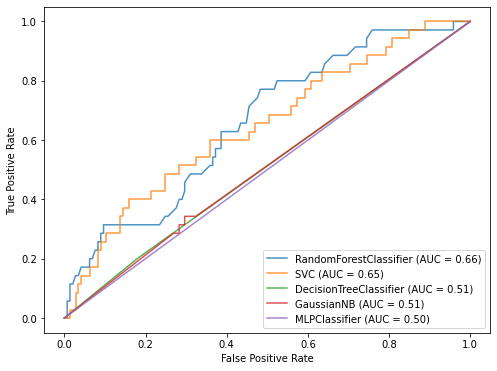

In [0]:
#from sklearn.metrics import roc_auc_score
#rf_probs = random_forest.predict_proba(X_test)[:, 1]
#roc_value = roc_auc_score(y_test, rf_probs)
#roc_value

plt.figure(figsize=(8,6))

ax = plt.gca()

plot_roc_curve(random_forest, X_test, y_test, ax=ax, alpha=0.8)
plot_roc_curve(svc,X_test, y_test, ax=ax, alpha=0.8)
plot_roc_curve(Dtree,X_test, y_test, ax=ax, alpha=0.8)
plot_roc_curve(GB,X_test, y_test, ax=ax, alpha=0.8)
plot_roc_curve(mlp,X_test, y_test, ax=ax, alpha=0.8)
plt.show()


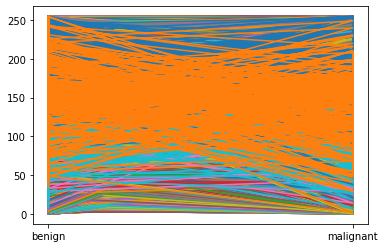

In [0]:
plt.plot(y_train,X_train)
plt.show()

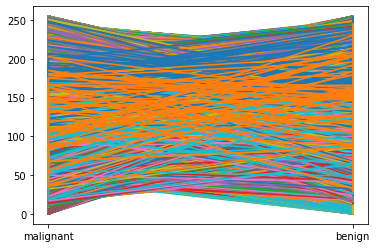

In [0]:
plt.plot(y_test,X_test)
plt.show()

In [0]:

feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [0]:
all_accuracies = cross_val_score(estimator=random_forest, X=X_train, y=y_train, cv=5)
print(all_accuracies)
print(all_accuracies.mean())
print(all_accuracies.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    9.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    7.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend L

[0.74305556 0.80555556 0.76388889 0.78472222 0.78472222]
0.7763888888888889
0.02124591463996994


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    9.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:    0.1s finished


In [0]:
stdsc = StandardScaler()
Ro = RobustScaler()

X_std=Ro.fit_transform(xpred) 
X_std=stdsc.fit_transform(X_std) 

kf = KFold(n_splits=5, random_state=None, shuffle=False) 
kf.get_n_splits(X)

for train_index, test_index in kf.split(X_std):
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = yresp[train_index], yresp[test_index]
    print("Train: X: %sy:%s Test: X: %s y: %s" %(X_train, y_train, X_test, y_test))


Train: X: [[-2.10841417 -2.04700657 -1.96333683 ...  0.12107268 -0.56454149
  -0.21743025]
 [-2.10841417 -2.04700657 -1.96333683 ...  0.60266465 -0.10160415
   0.42972788]
 [-2.10841417 -2.04700657 -1.96333683 ... -0.86305002 -2.08951153
  -1.19932535]
 ...
 [-0.01742491  0.19895727  0.11705521 ...  0.16295025 -0.04714094
   0.1619383 ]
 [ 0.90323454  0.89770158  0.81620335 ...  0.5398483   1.28720785
   0.96530702]
 [ 0.37268503  0.18232051  0.20231718 ... -0.10925391  0.19794353
   0.11730671]]y:180       benign
181       benign
182    malignant
183    malignant
184    malignant
         ...    
895       benign
896       benign
897       benign
898       benign
899       benign
Name: y, Length: 720, dtype: object Test: X: [[ 0.5599378   1.16388989  1.80524219 ... -1.00962148 -2.57968047
  -1.57869391]
 [ 0.31026744  0.51505589  0.78209857 ...  0.72829733 -0.51007827
   0.34046468]
 [-1.09412834 -0.96561657 -0.85493124 ...  0.95862392 -1.02747882
   0.02804352]
 ...
 [-0.12665569 -0.

720

In [0]:
stdsc = StandardScaler()  
pipe_rforest = make_pipeline(StandardScaler(),
       PCA(n_components=10),
       RandomForestClassifier(max_depth=10, n_estimators=123, max_features=1)) #make pipeline of decision tree
pipe_rforest.fit(X_train, y_train)
y_pred4 = pipe_rforest.predict(X_test) #fit the testing data into pipeline
print('Test Accuracy of Random Forest: %.3f' % pipe_rforest.score(X_test, y_test)) 

Test Accuracy of Random Forest: 0.794


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


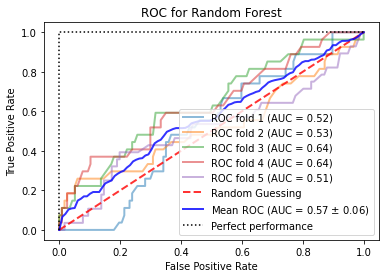

In [0]:
#ROC for Random Forest
from sklearn.metrics import roc_curve, auc
from scipy import interp


pipe_forest = make_pipeline(StandardScaler(),PCA(n_components=10),
                          RandomForestClassifier(n_estimators=250, random_state=123))
cv = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    pipe_forest.fit(X_train[train], y_train[train])
    viz = plot_roc_curve(pipe_forest, X_train[test], y_train[test],
                         name='ROC fold {}'.format(i+1),
                         alpha=0.5, lw=2, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random Guessing', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC for Random Forest")
ax.legend(loc="lower right")
plt.show()